## VIEWERS PRODUCTION STUDIO ##

## Problem Statement

The corporation faces the difficulty of having no past filmmaking experience when it enters the movie business by opening a new studio.  In order to make lucrative judgements, the studio must have a thorough understanding of current market trends.  In order to determine the primary elements that contribute to box office performance, this study will examine historical film data, with a particular emphasis on genres, production expenditures, and release dates.  The results will help the studio choose which kinds of films to make and release in a strategic manner.

## Business Objectives

**1. Maximize Box Office revenue by focussing on high-perfoming genres.**

Determine the most lucrative film genres (adventures, action, animation) and give priority to making films in these categories.  Utilise analysis data to concentrate on film genres that have historically brought in the most money at the box office.  For example, a studio can devote more resources to making action films if data indicates that they routinely generate more gross receipts than other genres.

**2. Timing film releases to maximize audience reach and revenue.**

Plan your movie releases for peak seasons (summer and holidays) to take advantage of increased attendance and boost profits.  Planning for a film's release might be aided by past performance data by month of release.  The studio can schedule the majority of important releases around these times if analysis demonstrates that films produced in the summer regularly bring in greater money.

**3. Optimize film budgets to achieve high return on investment.**

Set the budget for new films in a way that maximises return on investment without appreciably raising risk.  Drawing on the correlation between production budgets and box office performance, the studio can implement a strategy that ensures a higher probability of profitability while avoiding excessive expenditure on films with diminishing returns.  According to the data, films with budgets in this category routinely yield the best returns on investment.

# DATA CLEANING

In [1]:
#First Notebook

In [2]:
import pandas as pd
import sqlite3
import numpy as np

In [3]:
df1=pd.read_csv('bom.movie_gross.csv')#merge
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
df1.describe

<bound method NDFrame.describe of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700

In [5]:
df1.isnull().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [6]:
df1.duplicated().describe()

count      3387
unique        1
top       False
freq       3387
dtype: object

In [7]:
df1['foreign_gross'] = df1['foreign_gross'].str.replace(',', '', regex=False)
df1['foreign_gross'] = pd.to_numeric(df1['foreign_gross'])
df1['foreign_gross'].head()

0    652000000.0
1    691300000.0
2    664300000.0
3    535700000.0
4    513900000.0
Name: foreign_gross, dtype: float64

In [8]:
df1['foreign_gross'].max()

960500000.0

In [9]:
df1['foreign_gross'].fillna(0, inplace=True)
df1['studio'].fillna('Unknown', inplace=True)
df1['domestic_gross'].fillna(0, inplace=True)
df1.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [11]:
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [12]:
df2=pd.read_csv('tmdb.movies.csv')#merge
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [13]:
df2 = df2.drop(columns=['Unnamed: 0'])
df2['release_date'] = pd.to_datetime(df2['release_date'], errors='coerce')
df2['release_date'] = df2['release_date'].dt.date

In [14]:
df2.duplicated().describe()

count     26517
unique        2
top       False
freq      25497
dtype: object

In [15]:
df2.drop_duplicates(inplace=True)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          25497 non-null  object 
 1   id                 25497 non-null  int64  
 2   original_language  25497 non-null  object 
 3   original_title     25497 non-null  object 
 4   popularity         25497 non-null  float64
 5   release_date       25497 non-null  object 
 6   title              25497 non-null  object 
 7   vote_average       25497 non-null  float64
 8   vote_count         25497 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


In [17]:
df2.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [18]:
df3=pd.read_csv('tn.movie_budgets.csv', index_col=0)#merge
df3.head()


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [19]:
def clean_conv(df,column):
   for column in columns :
       df[column] = df[column].str.replace(',', '', regex=False)
       df[column] = df[column].str.replace('$', '', regex=False)
       df[column] = pd.to_numeric(df[column])
   return df

In [20]:
columns=['production_budget','domestic_gross','worldwide_gross']
df3=clean_conv(df3,columns)

In [21]:
df3['release_date'] = pd.to_datetime(df3['release_date'], errors='coerce')
df3['release_date'] = df3['release_date'].dt.date

In [22]:
df3.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [23]:
df3.duplicated().describe()

count      5782
unique        1
top       False
freq       5782
dtype: object

In [24]:
df4=pd.read_csv('rt.reviews.tsv', index_col=0,sep='\t', encoding='Latin-1')#merge
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 3 to 2000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      48869 non-null  object
 1   rating      40915 non-null  object
 2   fresh       54432 non-null  object
 3   critic      51710 non-null  object
 4   top_critic  54432 non-null  int64 
 5   publisher   54123 non-null  object
 6   date        54432 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.3+ MB


In [25]:
df4['date'] = pd.to_datetime(df4['date'], errors='coerce')
df4['date'] = df4['date'].dt.date

In [26]:
df4.duplicated().describe()

count     54432
unique        2
top       False
freq      52309
dtype: object

In [27]:
df4.drop_duplicates(inplace=True)

In [28]:
df4.isnull().sum()

review         3542
rating        13484
fresh             0
critic         2406
top_critic        0
publisher       308
date              0
dtype: int64

In [29]:
df4['review'].fillna('Unknown', inplace=True)
df4['rating'].fillna('Unknown', inplace=True)
df4['critic'].fillna('Unknown', inplace=True)
df4['publisher'].fillna('Unknown', inplace=True)
df4.isnull().sum()

review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64

In [30]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52309 entries, 3 to 2000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      52309 non-null  object
 1   rating      52309 non-null  object
 2   fresh       52309 non-null  object
 3   critic      52309 non-null  object
 4   top_critic  52309 non-null  int64 
 5   publisher   52309 non-null  object
 6   date        52309 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.2+ MB


In [31]:
df5=pd.read_csv('rt.movie_info.tsv', index_col=0, sep='\t'  )
df5.head()
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 146.2+ KB


In [32]:
df5.isnull().sum()

synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [33]:
df5['dvd_date'] = pd.to_datetime(df5['dvd_date'], errors='coerce')
df5['dvd_date'] = df5['dvd_date'].dt.date
df5['theater_date'] = pd.to_datetime(df5['theater_date'], errors='coerce')
df5['theater_date'] = df5['theater_date'].dt.date

In [34]:
def fill_vals(df,columns,value='unknown'):
    for column in columns:
        df[column].fillna(value, inplace=True)
    return df

In [35]:
columns=['synopsis','rating','genre','director','writer','theater_date','dvd_date','runtime']
df5=fill_vals(df5,columns)


In [36]:
df5.drop('currency',axis=1,inplace=True)
df5.drop('box_office',axis=1,inplace=True)
df5.drop('studio',axis=1,inplace=True)
df5.head(10)

,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
id,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104 minutes
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,108 minutes
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,116 minutes
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,128 minutes
7,unknown,NR,Drama|Romance,Rodney Bennett,Giles Cooper,unknown,unknown,200 minutes
8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,2000-03-03,2000-07-11,95 minutes
10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,2002-01-11,2002-06-18,82 minutes
13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,2006-04-27,2007-10-02,123 minutes
14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,2010-06-30,2010-11-09,117 minutes


In [37]:
df2.duplicated().describe()

count     25497
unique        1
top       False
freq      25497
dtype: object

# Objective 3: Optimize film budgets to achieve high return on investment.

In [38]:
# Load movie budget dataset
df_budget = pd.read_csv('tn.movie_budgets.csv')
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Clean the financial columns

In [39]:
# Remove dollar signs and commas, convert to float
df_budget['production_budget'] = df_budget['production_budget'].replace('[\$,]', '', regex=True).astype(float)
df_budget['domestic_gross'] = df_budget['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

### Calculate ROI

In [40]:
# ROI = (Revenue - Cost) / Cost
df_budget['ROI'] = (df_budget['worldwide_gross'] - df_budget['production_budget']) / df_budget['production_budget']
df_budget[['movie', 'production_budget', 'worldwide_gross', 'ROI']].sort_values('ROI', ascending=False).head()


,movie,production_budget,worldwide_gross,ROI
5745,Deep Throat,25000.0,45000000.0,1799.000000
5613,Mad Max,200000.0,99750000.0,497.750000
5492,Paranormal Activity,450000.0,194183034.0,430.517853
5679,The Gallows,100000.0,41656474.0,415.564740
5406,The Blair Witch Project,600000.0,248300000.0,412.833333


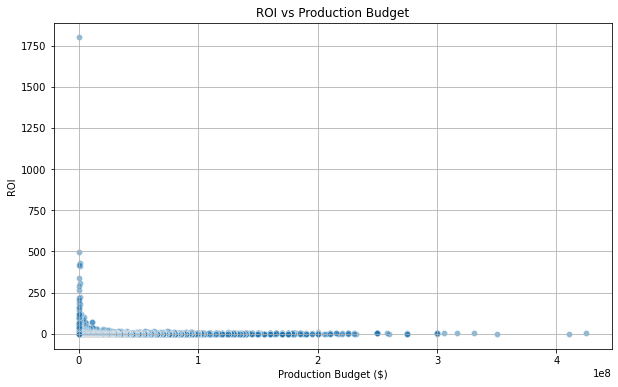

In [41]:
#plot ROI vs Budget

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_budget, x='production_budget', y='ROI', alpha=0.5)
plt.title('ROI vs Production Budget')
plt.xlabel('Production Budget ($)')
plt.ylabel('ROI')
plt.grid(True)
plt.show()

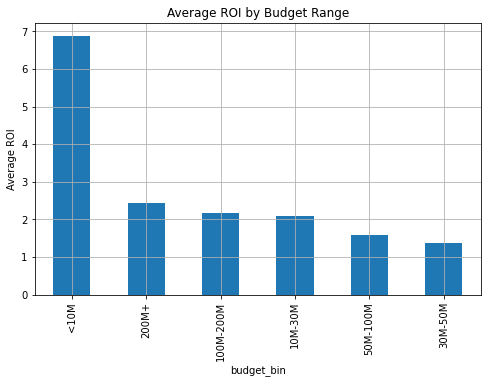

budget_bin
<10M         6.877582
200M+        2.437574
100M-200M    2.164028
10M-30M      2.086778
50M-100M     1.594578
30M-50M      1.365276
Name: ROI, dtype: float64

In [43]:
# Create bins for budget ranges
df_budget['budget_bin'] = pd.cut(df_budget['production_budget'],
                                  bins=[0, 10e6, 30e6, 50e6, 100e6, 200e6, df_budget['production_budget'].max()],
                                  labels=['<10M', '10M-30M', '30M-50M', '50M-100M', '100M-200M', '200M+'])

# Calculate average ROI per bin
avg_roi = df_budget.groupby('budget_bin')['ROI'].mean().sort_values(ascending=False)

# Plot
avg_roi.plot(kind='bar', figsize=(8,5), title='Average ROI by Budget Range')
plt.ylabel("Average ROI")
plt.grid(True)
plt.show()

avg_roi
